# Welcome to the course!

This is meant to be a very broad overview of machine learning topics, hopefully enough that you can hold a conversation about the topics we cover, but probably not enough to land a job as an ML engineer. There will be resources at the end if you want to know more :) 

## Pre-reqs
1. Watch this Essence of Linear Algebra playlist: https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab
2. Working intermediate Python knowledge (but if you're rusty that's okay, I am too)
   - in particular, basic understanding of numpy, pandas, scipy, statsmodels, scikitlearn
   - if you aren't familiar with some of these, that's okay too, just look over their documentation

# Math Interlude 

Math can be scary, believe me, I understand. But fundamentally, machine learning is using some fancy-looking math to make predictions about things we're interested in. If you don't have a formal math background, that's okay too, but I want to get some concepts reviewed so you can make sense of formulas and notation you see in other resources.

This is the notation for a sum, the capital Greek letter sigma: $\sum$. The indices, the bottom and top number, indicate what you're starting at and where it ends. So for example 

$\sum_{x=0}^{3} x$ 

just means 0 + 1 + 2 + 3

This is a matrix, which is just a collection of numbers. Data can be represented in matrix format, and often is for machine learning purposes. 

\begin{pmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22}
\end{pmatrix}

Also note the subscripts, those are used pretty frequently to denote "different" objects of the same type. So we might want to compare means (averages) between two different groups of people. Instead of saying "mean of people x vs mean of people y" we usually just write this: 

$\mu_1$ vs. $\mu_2$

This is read as "mu 1 vs. mu 2" or "mu-sub-1 vs. mu-sub-2"

You will also often see a variety of letters used to denote "arbitrary" numbers. This sounds insane at first, because, why would we talk about hypothetical numbers? But they're often used to generalize models to an arbitrary number of variables, parameters, whatever. For example, if we want to describe a linear model to someone, and we say "just use every variable you have" we can write: fit the model with $x_1, x_2, \dots x_j$. The $j$ here is just a placeholder value. If we have $j = 5$ variables, we would write $x_1, x_2, x_3, x_4, x_5$. Some common letters for this type of mathematical writing are $n$, $m$, $j$, $k$, and many others, but helpful to stick to those because they're convention. 

If you get more into ML, it will be essential to either take a linear algebra course or just read a textbook, but just being aware of the concepts is enough for now :) 

# General Overview

What is machine learning? 

*"a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions"* (wikipedia)

There are 3 main types: 

1. Supervised learning: we "know" our outcome data
2. Unsupervised learning: we don't know our outcome data, we want to find patterns
3. Reinforcement learning: exploration - exploitation (I know the least about this, so we won't cover it!)

There are plenty of other types and subfields, but these three categories cover most of it. Almost everything uses some blend of math, statistics, probability, and programming to create a machine learning model. 

I am a statistician by training, and we really like linear models, so some of this may be slightly more statistics-focused, and I will definitely use statistics-based notation. There are usually many different ways to write mathematical formulas depending on the field, even though they share similar ideas.

Here's our framework for machine learning: 

1. Identify the question we want to answer.
2. Perform EDA to get our data in shape (we won't do that here!)
3. Identify possible models and approaches.
4. Fit the models.
5. Evaluate the models for accuracy.
6. Interpret and communicate your results (or deploy to production).

Here are some basic tasks you might want to use ML for: 

**Regression**: Used to predict a continuous value. For example, predicting house prices based on features like location, size, and age.

**Classification**: Categorizing data into predefined classes. For instance, sorting emails into "spam" or "not spam."

**Clustering**: Grouping similar data points together. This is often used in customer segmentation, where customers with similar behaviors are grouped together.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score

# Supervised Learning

## Linear Regression: a basic example

This is "supervised" in the sense that we have a known outcome variable, often denoted $Y$. The most basic type of supervised learning is a linear model, you may have seen these before. In two dimensions, this is just $y = mx + b$ where: 

\begin{aligned}
y &= \text{outcome variable} \\ 
m &= \text{slope} \\ 
x &= \text{our predictor variable} \\ 
b &= \text{intercept}
\end{aligned}

Note that there are 100 names for $x$ and $y$, here are some of them. x is called a covariate, an independent variable, a predictor variable, or just "x". y is called the target variable, the dependent variable, the outcome variable, "variable of interest", "endpoint" (in clinical trials), or just "y". The b's or betas are almost always called coefficients or betas, though in other ML models they can be called parameters or weights. But trust me, it's kind of arbitrary. 

Say you, a normal person, go out and dig up 50 earthworms in your neighborhood, weigh them and measure them, and put them back in the ground. This is your data: 

In [30]:
# Generate random data
np.random.seed(0)  # For reproducibility
x = np.random.rand(100).reshape(-1, 1) # we have to reshape to make python happy 
y = 2 * x + 1 + np.random.randn(100).reshape(-1, 1) * 0.5

data = pd.DataFrame({'Weight (g) -> x': x.flatten(), 'Length (cm) -> y': y.flatten()}) # just for viewing our data
data.head()

,Weight (g) -> x,Length (cm) -> y
0,0.548814,1.515052
1,0.715189,2.880792
2,0.602763,2.438358
3,0.544883,1.321645
4,0.423655,2.591436


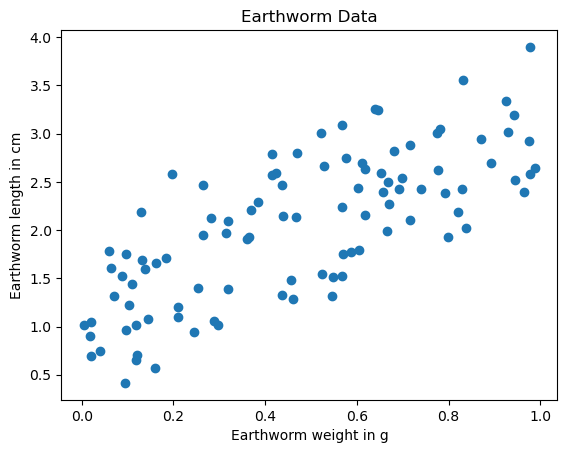

In [3]:
# Plotting the points
plt.scatter(x, y)
plt.title("Earthworm Data")
plt.xlabel("Earthworm weight in g")
plt.ylabel("Earthworm length in cm")
plt.show()

If we wanted to write our mathematical formula for fitting a model to this data, we would write: 

$y_{\text{length}} = \beta_0 + \beta_1 \cdot x_{\text{weight}}$ (notice that this is just y = mx + b)! 

### The test train-split

We don't want to fit our model on all the data we have, because we wouldn't be able to evaluate how good the model is on "unseen" data. This would be a bit like playing poker in practice rounds but you knew what cards the other players had. But, in real competitions, you wouldn't know. So you'd seem really good in practice but really bad in real games! 

This is extremely important: 

**DON'T TRAIN YOUR MODEL WITH TEST DATA!**

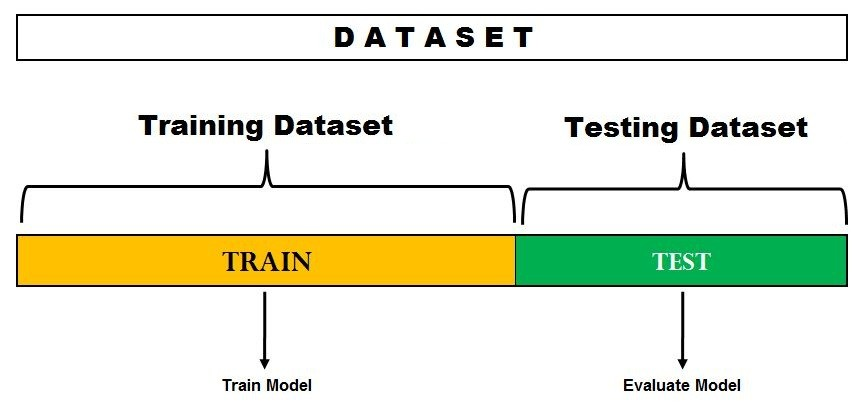

Fortunately, (almost?) everything you need is already available as a function. Try to rely on these built-in functions from different libraries for simplicity and time savings!

Aside: I constantly manually inspect objects or print them out so I know what I'm working with. 

In [4]:
# Split the data into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
x_train[0:5]

array([[0.15896958],
       [0.58651293],
       [0.52184832],
       [0.94466892],
       [0.79915856]])

In [6]:
y_train[0:5]

array([[0.57231037],
       [1.77132104],
       [3.00516766],
       [2.51561043],
       [1.9244376 ]])

In [7]:
# we did an 80 / 20 split which is common 
print(f"Total size of x: {len(x)}\n size of x_train: {len(x_train)}\n size of x_test: {len(x_test)}")

Total size of x: 100
 size of x_train: 80
 size of x_test: 20


### Fitting our first model!

Are you ready for the big reveal? When we say "fitting a model" or you hear someone say they have a machine learning model, they just have coefficient estimates. That's all it is, that's the whole game. 

In [8]:
# Fit the model 
model = LinearRegression() 
model.fit(x_train, y_train)

LinearRegression()

Here are the coefficients: 

In [9]:
# Print the results 
print("Coefficients:", model.coef_) 
print("Intercept:", model.intercept_) 

Coefficients: [[1.99990042]]
Intercept: [1.10517591]


### Interpreting Results

This is what sets you apart from a machine.

First, we can write our model based on the formula from above (the little carrot or "hat" indicates a predicted or estimated value): 

$\hat{y_{\text{length}}} = \hat{\beta_0} + \hat{\beta_1} \cdot x_{\text{weight}} = 1.1 + 1.99 \cdot x_{\text{weight}}$

We interpret these results as follows: 

1. at weight = 0g, we think on average a given earthworm will be 1.13 cm long. Of course, 0g is not a possible weight, so this intercept is not particularly meaningfull.
2. But, as we plug in weights we see the magic. For each 1 unit increment in weight, we expect to see length increase by 1.95 cm. 


### Some Predictions by Hand

To predict values, all we have to do is plug in values for $x_{weight}$. Say we find a worm that is 2g, how long do we think it is? 

$\hat{length} = 1.11 + 1.99 * 2 = 5.09 \text{ cm long}$ 

All we're doing is plugging in "new" values and predicting. Of course, we could just measure how long our worm is to confirm, but sometimes this isn't possible with your data. For example, if you're predicting the result of an NFL football game that hasn't happened yet. However, say we measure the worm and it's 5.5 cm long. So we were off by a little bit. This is the **error** of our prediction. Formally: 

$\text{error} = y - \hat{y} = 5.5 - 5.09 = 0.41$

Of course, we don't want to do this by hand for hundreds of new observations. We can confirm that we did the math correctly by hand with  ```model.predict()```

In [10]:
# what if we want to do this with code? 
new_obs = np.array([[2]]) # our 2g worm 
pred = model.predict(new_obs)
pred[0][0]

5.104976758498696

In [11]:
# on more than one observation
# _pred for prediction is a common convention
y_pred = model.predict(x_test)

y_pred[0:5]

array([[2.74708062],
       [2.04243165],
       [1.52290863],
       [2.25701155],
       [1.23346452]])

### Metrics for evaluating model fit

Of course, one of the most important things we want to check is **"how well does our model fit the data?"** This is a fundamental part of modeling - of course you can cram variables into a model and claim "this is great, we should just use every variable!" but that will lead to **overfitting** or matching the data too closely. We want a parsimonius model, or one that fits the data well with the fewest variables as possible. 

### Interlude: overfitting 

This is easiest to explain visually. We don't want our model to follow the data too closely, or it will be inaccurate when it sees new data. However, if we don't include enough variables, it won't be able to understand the structure in the data. We want to be just right. 

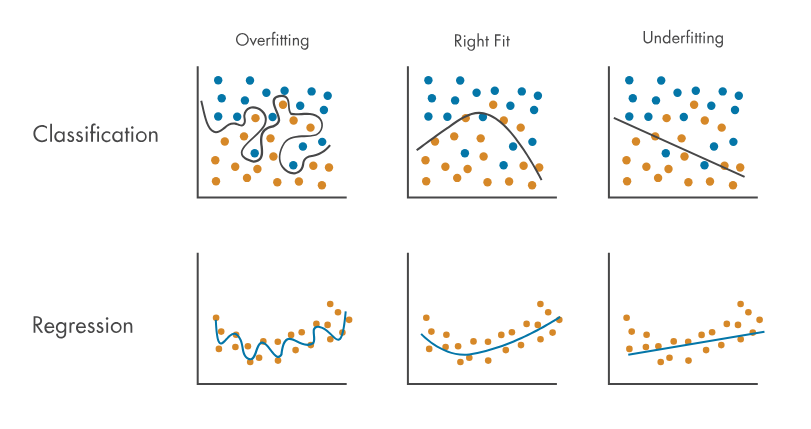

Now, since we only have 1 variable in our dataset, we can't really compare this to other models but we will in the next section. There are usually no hard and fast rules for what makes a "good" model, so it's helpful to compare them. 

**Mean Squared Error** or MSE: $= \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)$ : this is a way to measure how inaccurate our predicted values are compared to the true y values. 

$R^2$ = the proportion of variance in the target variable explained by the covariates




In [15]:
# Evaluate the model 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print("Mean Squared Error:", mse) 
print("R-squared:", r2)

Mean Squared Error: 0.20279015717455237
R-squared: 0.5800397295913791


# Other Supervised Learning Methods

So that's the basic idea. Of course, sometimes we spend 75% of the time cleaning the data to get it in good enough shape to model it. We won't go over that here since you should have seen it if you took data analysis! To recap: 

1. Identify the question we want to answer.
2. Do EDA if necessary. 
4. Identify possible models and approaches.
5. Fit the models.
6. Evaluate the models for accuracy.
7. Interpret and communicate your results (or deploy to production).

Keep these steps in mind. In the interest of time we won't go as in-depth on each of these methods, and the math gets quite complicated, but I want to show you at a high level how to get started. 

## logistic regression 

You can do a huge amount of work with linear and logistic regression. Sometimes, say with government data, your models have to be **interpretable**, which means we can actually tell what the model is doing. Some models, called black box models, like neural nets, aren't as interpretable. So in some cases, you're required by law to use certain models! This isn't necessarily bad - if you're automatically rejecting a loan application at a bank, you want to be able to explain why. Interpretability here is knowing what the betas are. 

I won't get into the math, but logistic regression is a transformation of linear regression that allows us to use a linear model, but output probabilities, which are between 0 and 1. We would write that as $p \in [0,1]$. The E looking character, epsilon, means "in" and the brackets mean "from 0 to 1".

Here's the set up: we want to predict the probabilities of a binary outcome. Say, whether or not it will rain on a given day. With linear regression, we would output numbers $\in [-\infty, \infty]$, so we need a new model. After we predict everything, we'll choose a cutoff probability, say 0.5, to say if the event happens or not. 

Let's try with a real data set. Say we want to use a few attributes and try to predict the sex of a given penguin. 

In [14]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [42]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [45]:
# remove nulls, we want to predict sex. Might crash if we don't. 
penguins = penguins.dropna()

# Select features and target variable 
X = penguins.drop(columns=['bill_length_mm', 'bill_depth_mm', 'sex', 'species', 'island']) 
y = penguins['sex'] 

X.columns

Index(['flipper_length_mm', 'body_mass_g'], dtype='object')

In [46]:
# Split the data into training and testing sets 
# note the random_state argument, we want to be able to reproduce our work and this is randomly splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [47]:
# look at y_train, etc here if we want 
y_test

30     Female
317    Female
79       Male
201    Female
63       Male
        ...  
288    Female
4      Female
83       Male
319      Male
66     Female
Name: sex, Length: 67, dtype: object

In [48]:
# Fit the Logistic Regression Model 
model = LogisticRegression(max_iter=200) 
model.fit(X_train, y_train) 

LogisticRegression(max_iter=200)

In [49]:
# Make predictions and evaluate the model 
y_pred = model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 68.66%


It's always helpful to try to inspect your data so you can wrap your head around things. Looking at ```y_pred```, we see that it's output predictions of each penguin which we compared against ```y_test```.

In [40]:
y_pred

array(['Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female'], dtype=object)

Cool, so we can predict with 68.7% accuracy the sex of a penguin based on flipper length and body mass. If males tend to be heavier than females and it helps us make predictions, we would say it has a lot of **predictive power**.

This is great, but we only used two covariates: ```flipper_length_mm``` and ```body_mass_g```. Also, note that this is multivariate logistic regression. That sounds complicated, but you did it in a few lines of code! Let's try adding more variables and see what happens. 

In [50]:
X_2 = penguins.drop(columns=['sex', 'species', 'island']) 
y_2 = penguins['sex'] 

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42) 

model_2 = LogisticRegression(max_iter=200) 
model_2.fit(X_train, y_train) 

y_pred = model_2.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 88.06%


Wow, that's a huge jump in accuracy! If we choose to use this second model, we call that **model selection**. That is, we have a few competing models and we want to figure out which is best. This is a basic way to do it, just choose the model with higher accuracy. There are tons and tons and tons of different strategies and different metrics you can compare, so you can dive into that after this class. 

## Ridge and Lasso Regression

cross validation and tuning 

# Unsupervised Learning

## k-means

## PCA 

model tuning

k-fold cross validation 

bias-variance tradeoff 